<h2 style = "color: seagreen" align = "center"> Specialized Visualization Tool: Pie chart - Boxplot - Scatter - Bubble </h2>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Downloading and Prepping Data](#2)<br>
2.  [Visualizing Data using Matplotlib](#4) <br>
3.  [Pie Charts](#6) <br>
4.  [Box Plots](#8) <br>
5.  [Scatter Plots](#10) <br>
6.  [Bubble Plots](#12) <br>

</div>


# Downloading and Prepping Data <a id="1"></a>


In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read excel dataset file
df_can = pd.read_excel('E:\Python\ML_Learn\Data Visualization\Specialized Visualization Tool\Canada.xlsx',
                       sheet_name = "Canada by Citizenship",skiprows = range(20), skipfooter = 2)
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.


In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

# Visualizing Data using Matplotlib<a id="2"></a>


# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [5]:
# group countries by continents and apply sum() function
df_continent = df_can.groupby('Continent',axis = 0).sum()
df_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


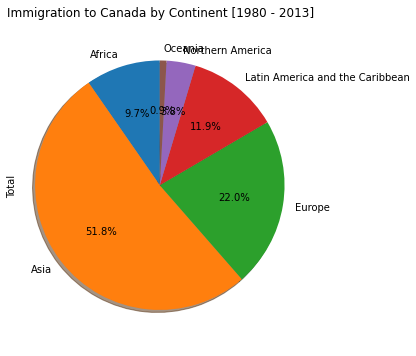

In [6]:
#Plot a piechart for 'total' columns
df_continent['Total'].plot(kind = 'pie',figsize = (5,6),autopct = '%1.1f%%',startangle = 90,shadow = True);
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.

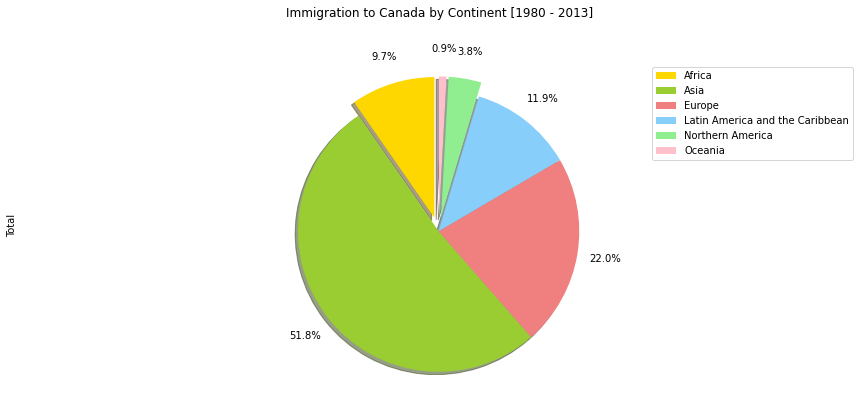

In [7]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
df_continent['Total'].plot(kind='pie',figsize = (15,6),
                           autopct = '%1.1f%%',startangle = 90, shadow= True, labels = None,
                           colors = color_list,explode=explode_list,pctdistance = 1.2)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal')
plt.legend(labels = df_continent.index,loc ='upper right');

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

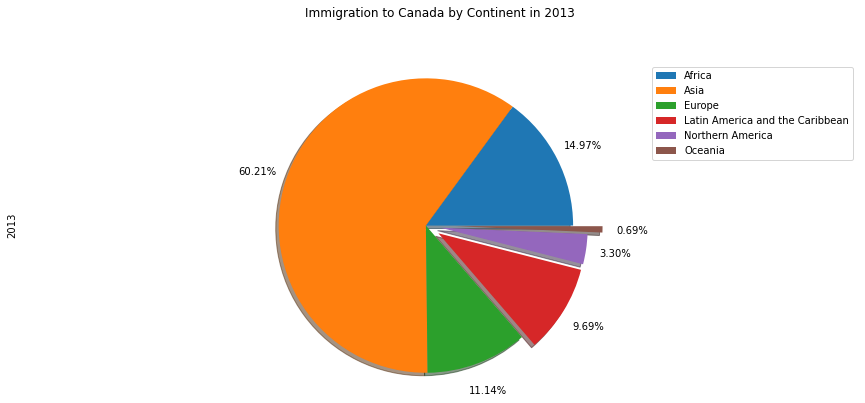

In [8]:
explode_list = [0, 0, 0, 0.1, 0.1, 0.2]
df_continent['2013'].plot(kind='pie',figsize = (15,6),shadow = True,autopct = "%1.2f%%",explode = explode_list
                         ,pctdistance = 1.2,labels = None)
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.legend(labels = df_continent['2013'].index)
plt.axis('equal');

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">


To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


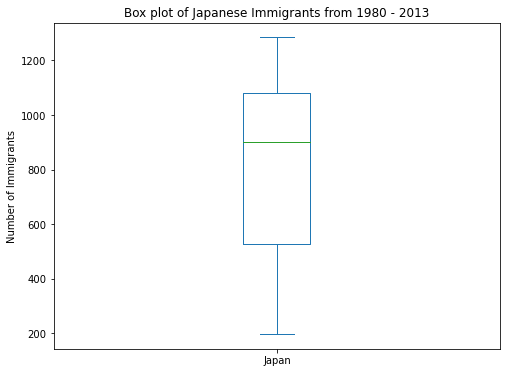

In [9]:
#Take a look at dataset to plot
df_japan = df_can.loc[['Japan'],years].transpose()
df_japan.plot(kind='box',figsize = (8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show();

In [10]:
#compare to actual data
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.


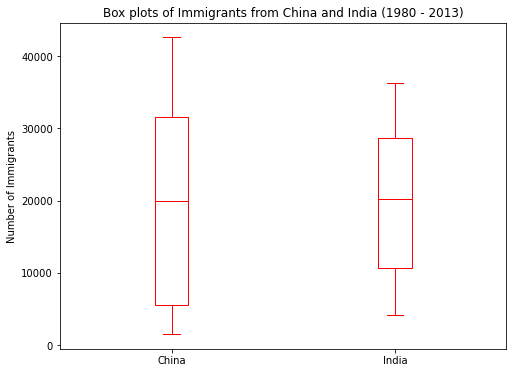

In [11]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.plot(kind = 'box',figsize = (8,6),color = 'red');
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

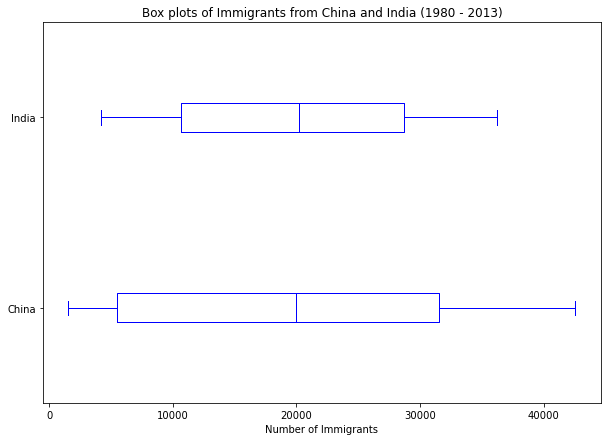

In [12]:
#Vertical boxplot
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


Text(0.5, 0, 'Years')

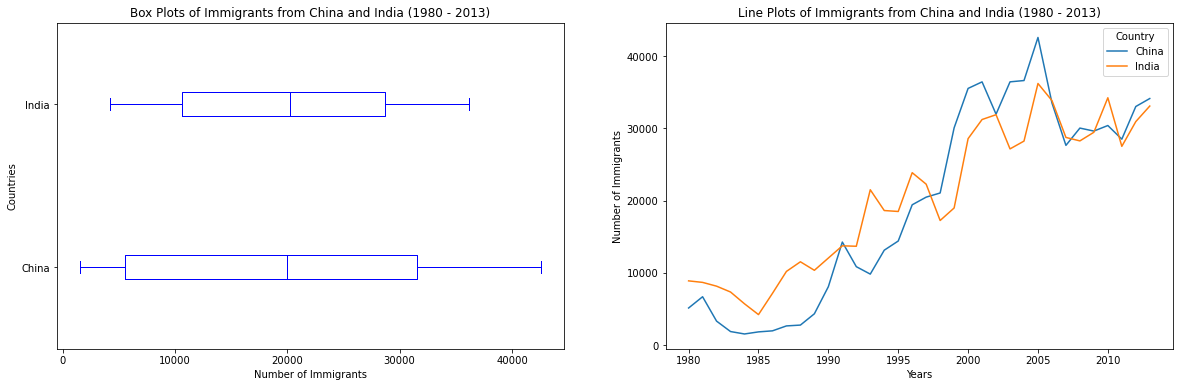

In [13]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
#Subplot 1: Boxplot
df_CI.plot(kind ='box',figsize = (10,6),color = 'blue',vert = False,ax = ax0)
ax0.set(title = 'Box Plots of Immigrants from China and India (1980 - 2013)',
        xlabel ='Number of Immigrants',ylabel = 'Countries');
#Subplot 2: Lineplot
df_CI.plot(kind = 'line',figsize = (20,6),ax = ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

In [14]:
#Sort to find top 15
df_sort = df_can.sort_values(['Total'],ascending = False)
df_top15 = df_sort.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [15]:
year_80s = list(map(str,range(1980,1990)))
year_90s = list(map(str,range(1990,2000)))
year_00s = list(map(str,range(2000,2010)))
df_80s = df_top15.loc[:,year_80s].sum(axis = 1)
df_90s = df_top15.loc[:,year_90s].sum(axis = 1)
df_00s = df_top15.loc[:,year_00s].sum(axis = 1)
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s,'2000s':df_00s})
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


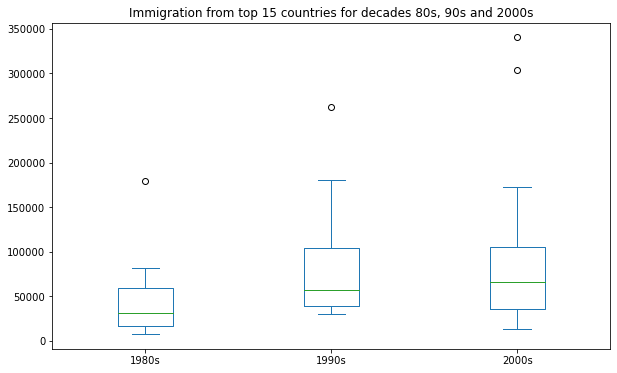

In [16]:
new_df.plot(kind='box',figsize = (10,6));
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


In [17]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.reset_index(inplace = True)
df_tot.columns=['Year','Total']
df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


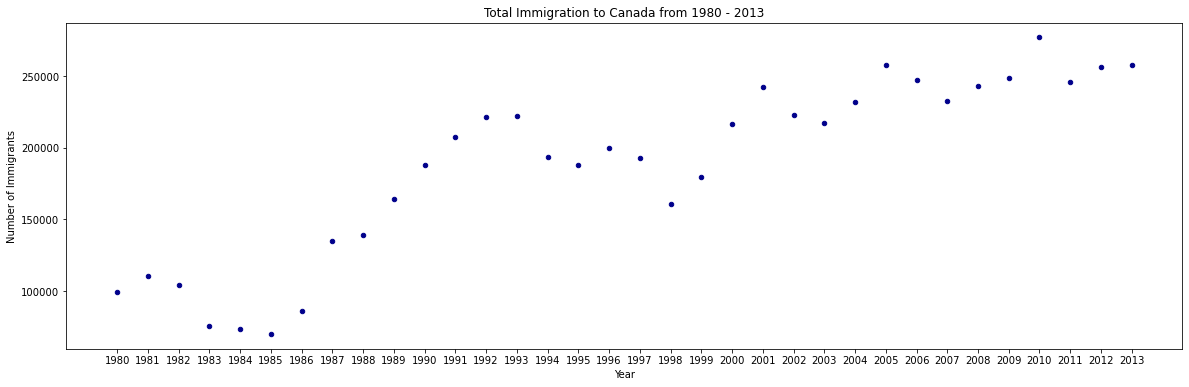

In [18]:
df_tot.plot(kind = 'scatter',x = 'Year',y = 'Total',figsize = (20,6),color = 'darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

In [19]:
#Regresion line
x = list((map(int,df_tot['Year'])))
x = np.array(x)
y = df_tot['Total']
reg = np.polyfit(x,y,deg = 1)
reg

array([ 5.56709228e+03, -1.09261952e+07])

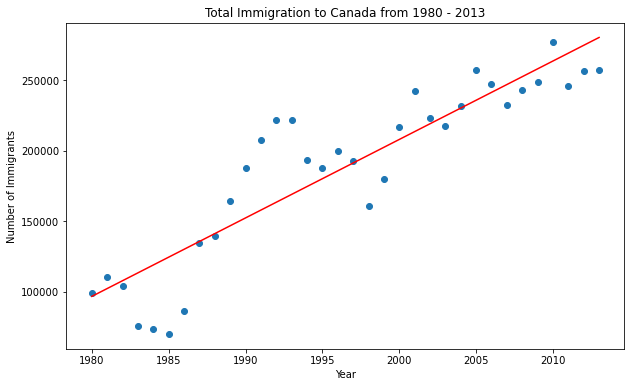

In [20]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(x,np.array(df_tot['Total']))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, reg[0] * x + reg[1], color='red') # recall that x is the Years

plt.show()

**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


In [23]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years]
df_countries

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [25]:
df_countries.transpose().head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [37]:
df_total = pd.DataFrame(df_countries.sum(axis = 0))
df_total.reset_index(inplace = True)
df_total.columns = ['year','total']
df_total.head()
df_total.year = df_total.year.astype('int') #Convert year columns from str to int for plotting

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


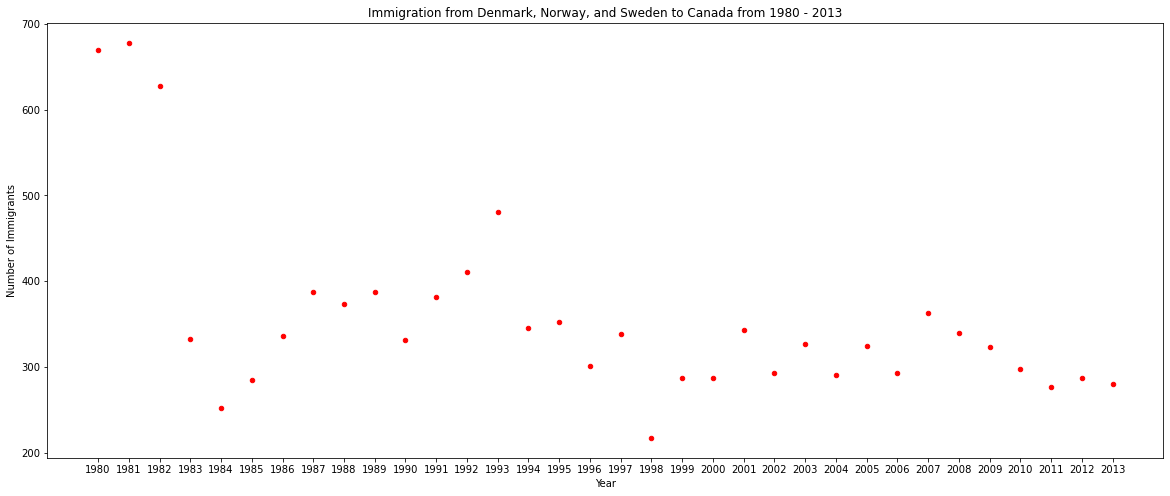

In [43]:
df_total.plot(kind = 'scatter',x = 'year',y='total',figsize = (20,8),color = 'red')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# show plot
plt.show()

# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


In [60]:
#Get the data from Brazil and Argentina
df_brag = df_can.loc[['Brazil','Argentina'],years].transpose()
df_brag.index.name = 'Year'
df_brag.reset_index(inplace = True)
df_brag.head()

Country,Year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


**Create the normalized weights**

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [63]:
#Data scaling
norm_bra = (df_brag['Brazil']-df_brag['Brazil'].min())/(df_brag['Brazil'].max()-df_brag['Brazil'].min())
norm_arg = (df_brag['Argentina']-df_brag['Argentina'].min())/(df_brag['Argentina'].max()-df_brag['Argentina'].min())

**Plot the data.**

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


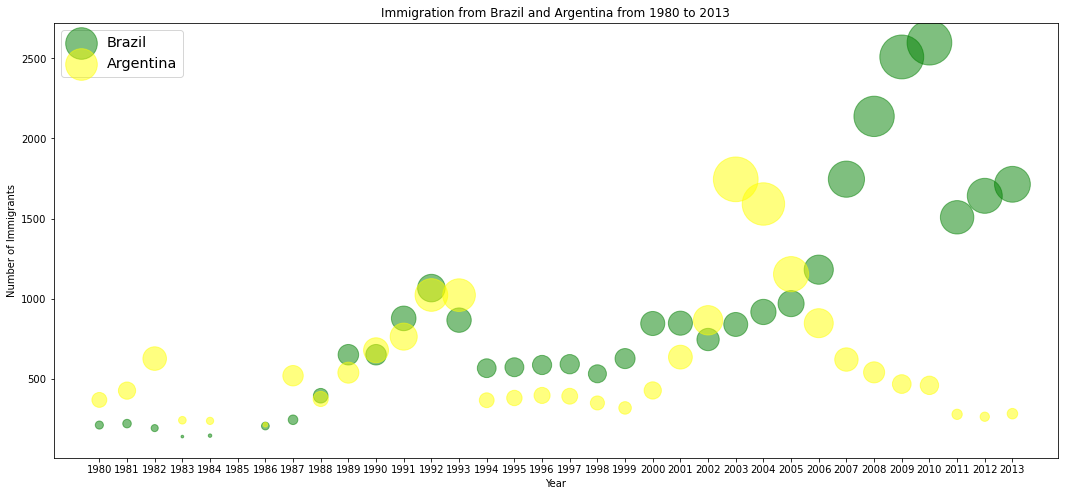

In [87]:
ax0 = df_brag.plot(kind = 'scatter',x = 'Year', y = 'Brazil', 
                   figsize = (18,8),s = norm_bra * 2000,color = 'green',alpha = 0.5)
ax1 = df_brag.plot(kind = 'scatter',x = 'Year', y = 'Argentina', 
                   figsize = (18,8),s = norm_arg * 2000,color = 'yellow',ax = ax0,alpha = 0.5)
plt.legend(labels = ['Brazil','Argentina'],loc = 'upper left',fontsize = 'x-large')
ax0.set(title = 'Immigration from Brazil and Argentina from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants');

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.


In [96]:
df_chin = df_can.loc[['China','India'],years].transpose()
df_chin.index.name = 'Year'
df_chin.reset_index(inplace = True)
df_chin.head()


Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


In [103]:
norm_china = (df_chin['China']-df_chin['China'].min())/(df_chin['China'].max()-df_chin['China'].min())
norm_india = (df_chin['India']-df_chin['India'].min())/(df_chin['India'].max()-df_chin['India'].min())

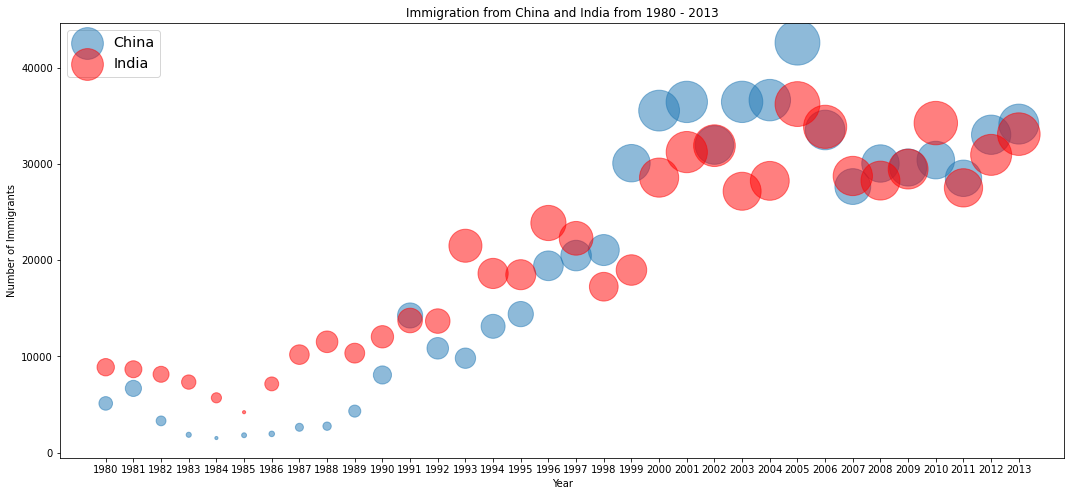

In [113]:
ax2 = df_chin.plot(kind = 'scatter',x = 'Year',y = 'China',figsize = (18,8),s = norm_china*2000 + 10,alpha = 0.5)
ax3 = df_chin.plot(kind = 'scatter',x = 'Year',y = 'India',ax = ax2,s = norm_india *2000 + 10,color = 'red',alpha = 0.5)
ax2.set_ylabel('Number of Immigrants')
ax2.set_title('Immigration from China and India from 1980 - 2013')
ax2.legend(['China', 'India'], loc='upper left', fontsize='x-large');